# Airbnb data exploration

*With the guide from https://www.kaggle.com/davidgasquez/airbnb-recruiting-new-user-bookings/user-data-exploration/notebook*


Import necessary stuffs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Allow matplot to display via notebook
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

## 1. Loading data
Load data **train_users** and **test_users**, and check its basic properties

In [2]:
# Load the data into DataFrames
train_users = pd.read_csv('./data/train_users_2.csv')
test_users = pd.read_csv('./data/test_users.csv')

# Print total user from dataframe.shape[rows,cols]
print("Loaded", train_users.shape[0], "train users and", test_users.shape[0], "users.")

print("====[ Train users have", len(train_users.columns.values.tolist()), "columns ]====\n",\
      train_users.columns.values.tolist(),"\n")

print("====[ Test users have", len(test_users.columns.values.tolist()), "columns ]====\n",\
      test_users.columns.values.tolist(),"\n")

print("Different column is ###", set(train_users.columns.values.tolist()) - set(test_users.columns.values.tolist()), "###")

Loaded 213451 train users and 62096 users.
====[ Train users have 16 columns ]====
 ['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'] 

====[ Test users have 15 columns ]====
 ['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser'] 

Different column is ### {'country_destination'} ###


## 2. Merging data
Merge **train_users** and **test_users** into **users**

**But the field 'country_destination' will be 'NaN' for the 'test_users' field.**

In [3]:
# Merge train and test users
#users = train_users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

# Print total user from dataframe.shape[rows,cols]
print("Merged into", users.shape[0], "users.")

Merged into 275547 users.


### Display users [0-4]

In [4]:
users.head(5)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


## 3. Data *pre-processing* and *exploring*
### Replace a gender '-unknown-' with NaN

In [5]:
users['gender'].replace('-unknown-', np.nan,inplace=True)

In [6]:
users.head(5)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,20091208061105


## Counting how many percent of the *missing* data.

**Note**
*country_destination* is known as all Nan from the test_users.

In [7]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100

# This is to calculate the percentage of null/NaN within the data
# .count() tell how much non-null/NaN
# .isnull().sum() tell how much null/NaN
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

## Treating data as they are

Ref: http://pandas.pydata.org/pandas-docs/stable/categorical.html

The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.

**timestamp_first_active** will be transformed into date-time as **date_first_active**

In [39]:
# Category type
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

# Date-time type
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users['timestamp_first_active'] // 1000000), format='%Y%m%d')

# Do it also for train and test user
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'])
train_users['date_first_active'] = pd.to_datetime((train_users['timestamp_first_active'] // 1000000), format='%Y%m%d')
test_users['date_account_created'] = pd.to_datetime(test_users['date_account_created'])
test_users['date_first_booking'] = pd.to_datetime(test_users['date_first_booking'])
test_users['date_first_active'] = pd.to_datetime((test_users['timestamp_first_active'] // 1000000), format='%Y%m%d')

## ======================== [ age ] ========================

*Using dataframe.describe() to see roughly what happen to the data*

In [9]:
users['age'].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

So, we see some error in the data.

e.g. **age == 1** and **age == 2014**

So, take a look more with age histogram..

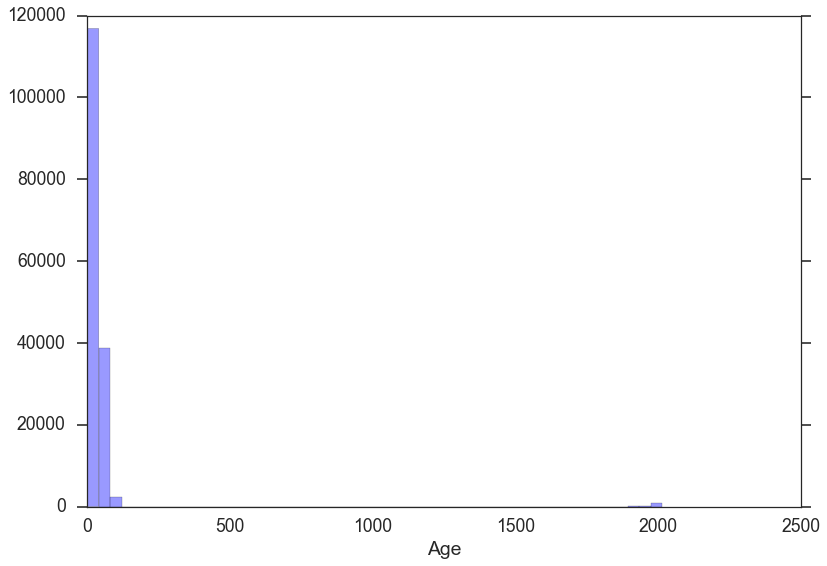

In [10]:
sns.distplot(users['age'].dropna(), kde=False, color="b")
plt.xlabel('Age')

plt.show()

### Replacing age noise with NaN
As Airbnb allow 18+ and very old people like 100+ might be fault inputs.

In [11]:
users['age'][users['age'] < 18].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [12]:
users['age'][users['age'] > 100].describe()

count    2690.000000
mean      690.957249
std       877.927570
min       101.000000
25%       105.000000
50%       105.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

### Replace it with NaN and show histogram again

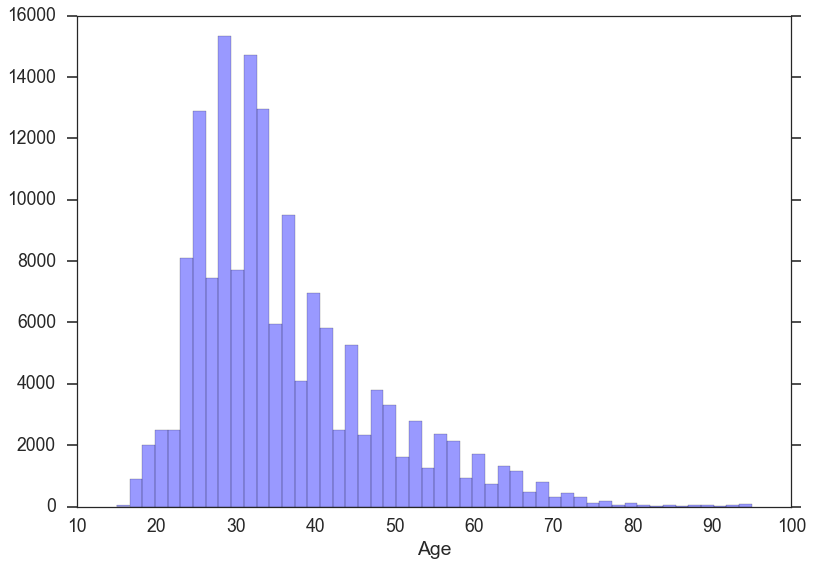

In [91]:
# Replace it with NaN
users.loc[users['age'] > 95, 'age'] = np.nan
users.loc[users['age'] < 13, 'age'] = np.nan

# Plot
sns.distplot(users['age'].dropna(), kde=False, color="b")
plt.xlabel('Age')

plt.show()

In [14]:
print("The users with age around", int(users['age'].mean()), "are quite popular in airbnb")

The users with age around 36 are quite popular in airbnb


## KNOWLEDGE
Age ~36 is peak for Airbnb

**-END**

## ======================== gender ========================

In [15]:
print("Total female user:", users['gender'][users['gender'] == 'FEMALE'].count())
print("Total male user:", users['gender'][users['gender'] == 'MALE'].count())

Total female user: 77524
Total male user: 68209


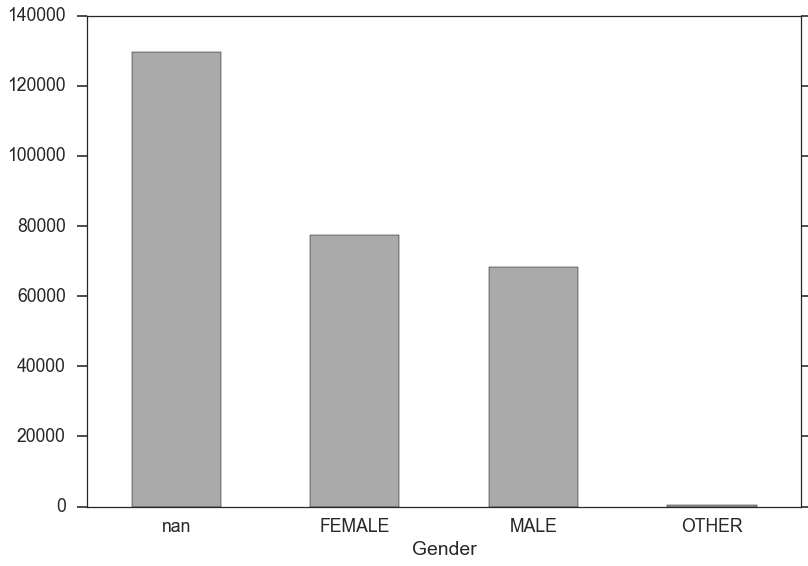

In [16]:
(users['gender'].value_counts(dropna=False)).plot(kind='bar', color='#AAAAAA', rot=0)
plt.xlabel('Gender')

plt.show()

## KNOWLEDGE
Female seemed to use Airbnb more than male

**-END**

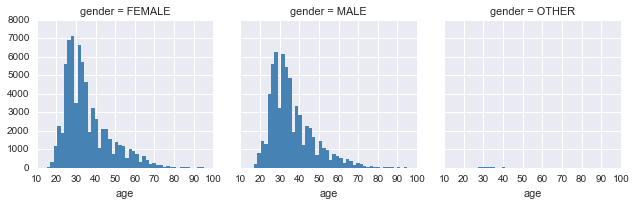

In [17]:
sns.set(style="darkgrid")
g = sns.FacetGrid(users, dropna=False, col="gender", margin_titles=True)
bins = np.linspace(10, 95, 50)
g.map(plt.hist, "age", color="steelblue", bins=bins, lw=0)

plt.show()

## ======================== country ========================

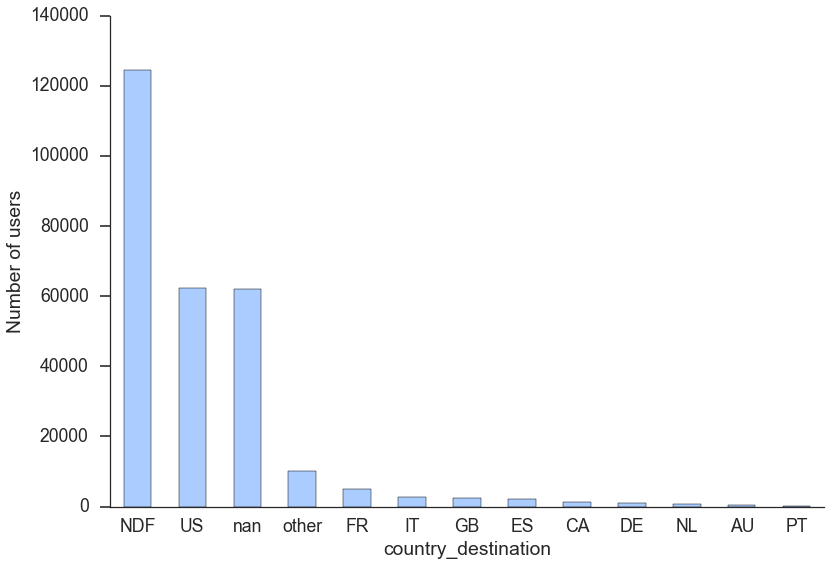

In [18]:
country_total = users['country_destination'].value_counts(dropna=False)

sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

country_total.plot(kind='bar', color='#AACCFF', rot=0)
plt.xlabel('country_destination')
plt.ylabel('Number of users')

sns.despine()
plt.show()

## KNOWLEDGE
With Airbnb, a lot people go to US

**-END**

## Absolute gender percentage

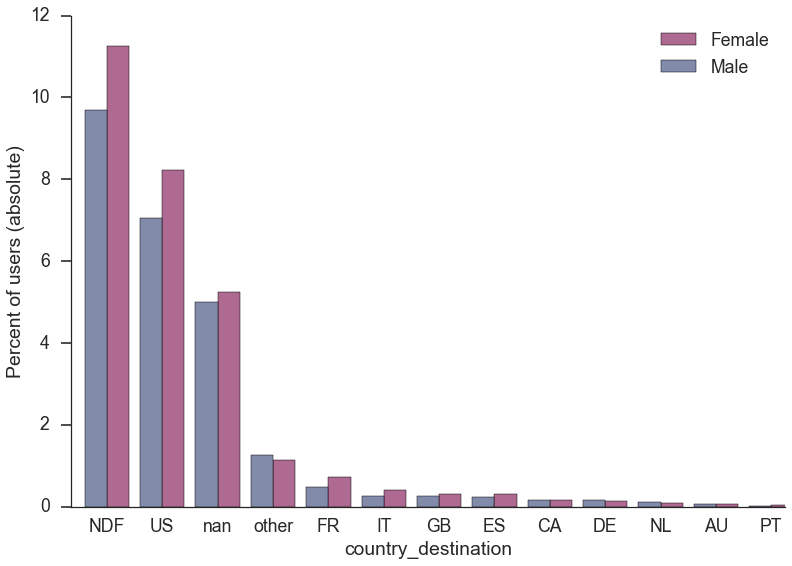

In [19]:
country_user_total = users.shape[0]
country_female = users.loc[users['gender'] == 'FEMALE','country_destination'].value_counts(dropna=False)
country_male = users.loc[users['gender'] == 'MALE','country_destination'].value_counts(dropna=False)
country_other = users.loc[users['gender'] == 'OTHER','country_destination'].value_counts(dropna=False)
country_nan = users.loc[users['gender'].isnull(),'country_destination'].value_counts(dropna=False)

# Bar width
width = 0.4
(country_female / country_user_total * 100).plot(kind='bar', width=width, color='#AE6A90', label='Female', position=0, rot=0)
(country_male / country_user_total * 100).plot(kind='bar', width=width, color='#838BAA', label='Male', position=1, rot=0)
plt.legend()
plt.xlabel('country_destination')
plt.ylabel('Percent of users (absolute)')

sns.despine()
plt.show()

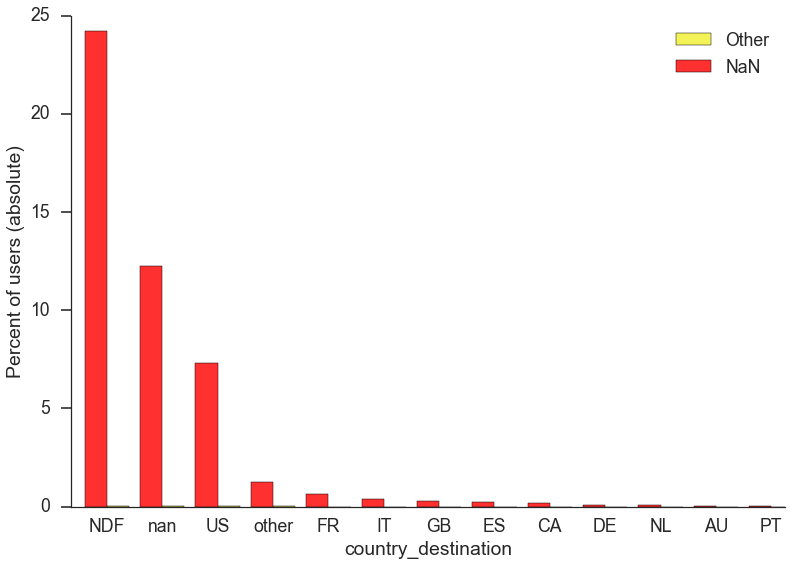

In [20]:
plt.figure(dpi = 300)
(country_other / country_user_total * 100).plot(kind='bar', width=width, color='#F3F358', label='Other', position=0, rot=0)
(country_nan / country_user_total * 100).plot(kind='bar', width=width, color='#FF3030', label='NaN', position=1, rot=0)
plt.legend()
plt.xlabel('country_destination')
plt.ylabel('Percent of users (absolute)')

sns.despine()
plt.show()

## Relative gender percentage

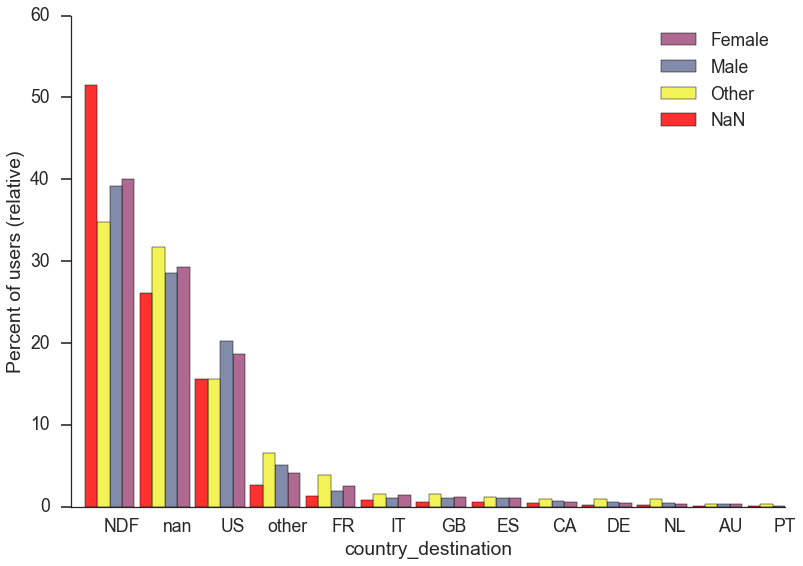

In [21]:
# Bar width
width = 0.225

(country_female / sum(country_female) * 100).plot(kind='bar', width=width, color='#AE6A90', label='Female', position=0, rot=0)
(country_male / sum(country_male) * 100).plot(kind='bar', width=width, color='#838BAA', label='Male', position=1, rot=0)
(country_other / sum(country_other) * 100).plot(kind='bar', width=width, color='#F3F358', label='Other', position=2, rot=0)
(country_nan / sum(country_nan) * 100).plot(kind='bar', width=width, color='#FF3030', label='NaN', position=3, rot=0)

plt.legend()
plt.xlabel('country_destination')
plt.ylabel('Percent of users (relative)')

sns.despine()
plt.show()

## Destination for younger and older

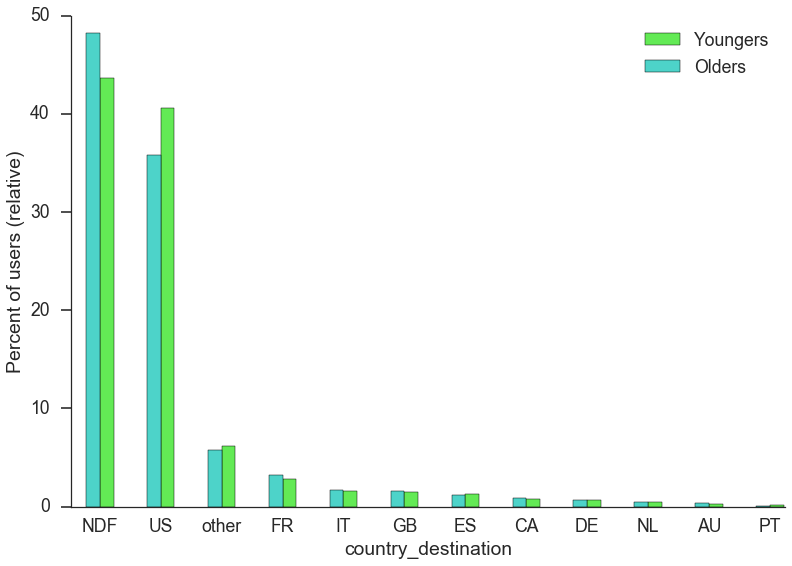

In [22]:
# int(users['age'].mean()) is 36
age = int(users['age'].mean())

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('country_destination')
plt.ylabel('Percent of users (relative)')

sns.despine()
plt.show()

## KNOWLEDGE
With Airbnb,
**Younger people** trend to go to US, **Older people** trend to go to the other country

**-END**

## ======================== [ language ] ========================

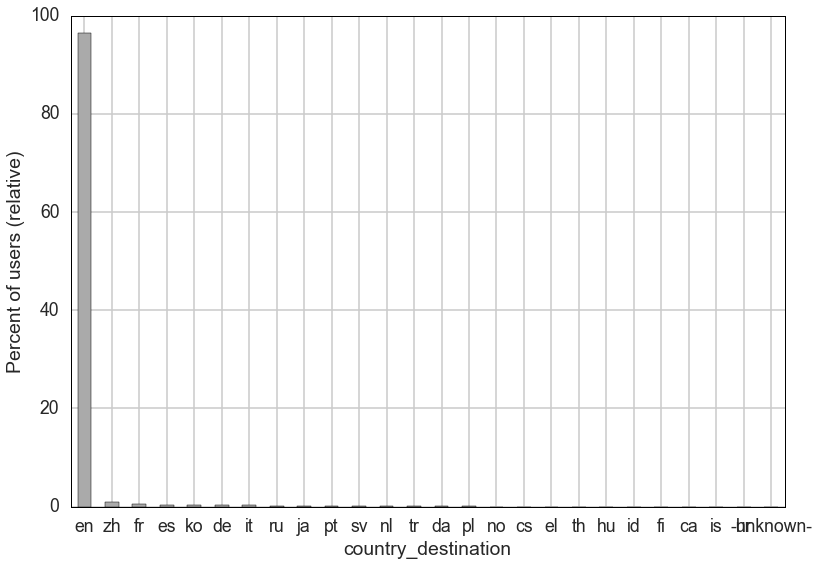

In [42]:
(users['language'].value_counts(dropna=False) / users.shape[0] * 100).plot(kind='bar', color='#AAAAAA', rot=0)

plt.xlabel('country_destination')
plt.ylabel('Percent of users (relative)')

sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)
plt.show()

In [24]:
(users['language'] == 'en').value_counts(dropna=False) / users.shape[0] * 100

True     96.367589
False     3.632411
Name: language, dtype: float64

## KNOWLEDGE
Most people use English (**96%** of Airbnb)

But in some cases, Asian people prefer to use English with the internation site!!

**-END**

## ======================== [ date_account_created ] ========================

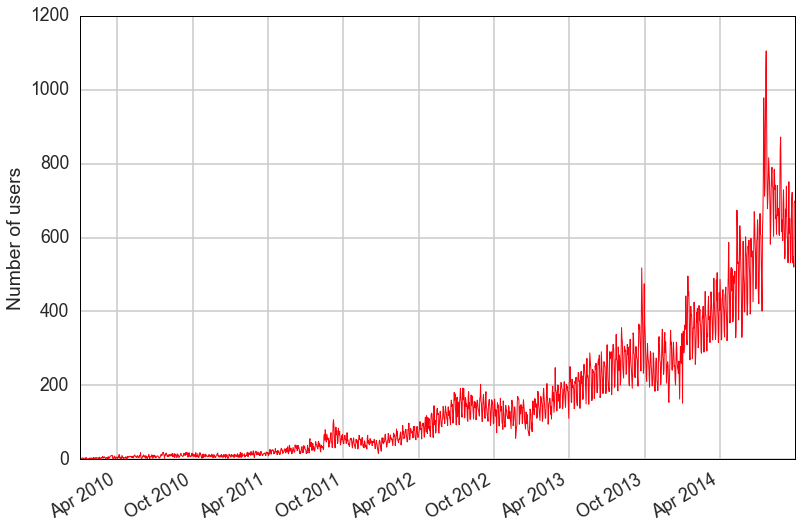

In [25]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)

users['date_account_created'].value_counts().plot(kind='line', linewidth=1, color='#FC010E')
plt.ylabel('Number of users')
plt.show()

## ======================== [ date_first_active ] ========================

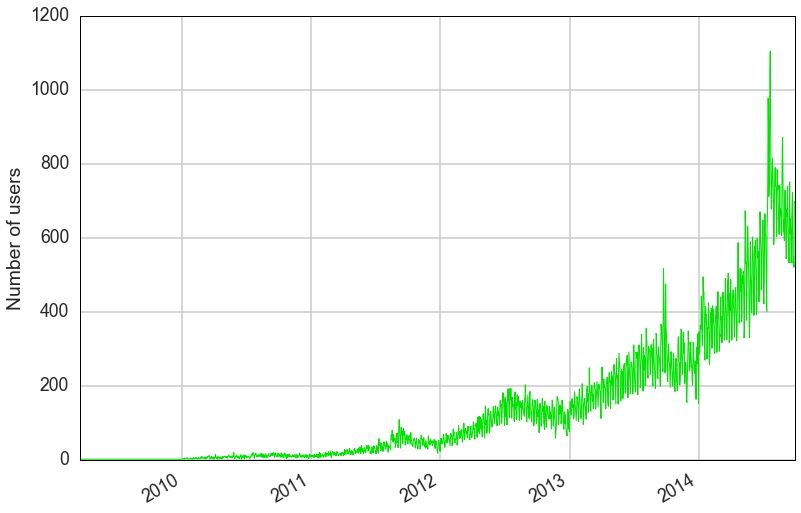

In [26]:
users['date_first_active'].value_counts().plot(kind='line', linewidth=1, color='#01E201')
plt.ylabel('Number of users')
plt.show()

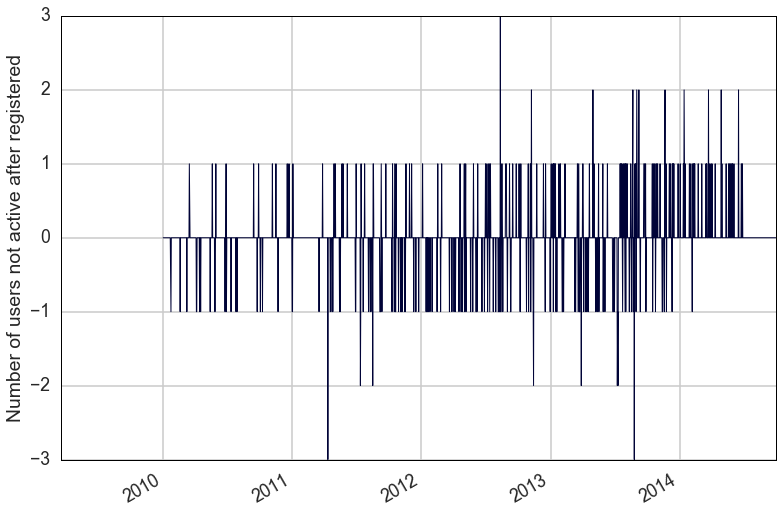

In [27]:
(users['date_account_created'].value_counts() - users['date_first_active'].value_counts()).plot(kind='line', linewidth=1, color='#000337')
plt.ylabel('Number of users not active after registered')
plt.show()

## KNOWLEDGE
Airbnb grow a lot every years
**date_account_created** and **date_first_active** are not much different

**-END**

## ============== [ date_first booking vs. date_first_active ] ==============

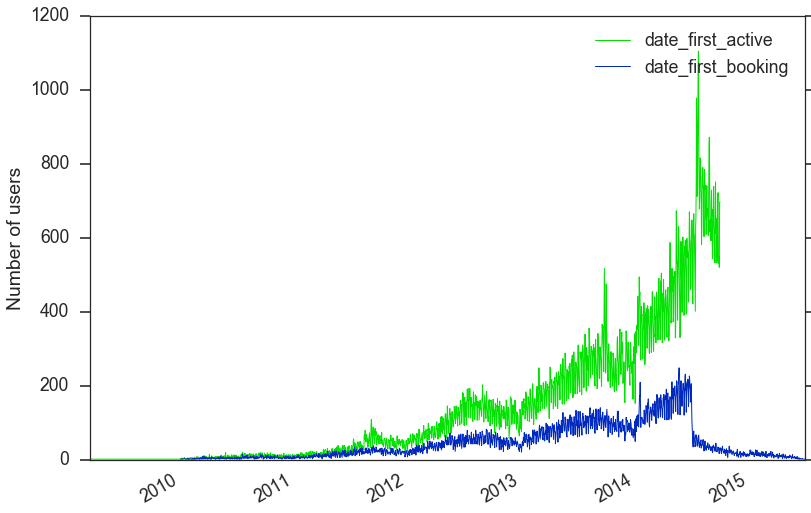

In [51]:
users['date_first_active'].value_counts().plot(kind='line', linewidth=1, color='#01E201')
users['date_first_booking'].value_counts().plot(kind='line', linewidth=1, color='#0029BF')

plt.legend()
plt.ylabel('Number of users')
plt.show()

**So, some different peak happends in between 2014 and 2015**

Let's see the result from **train_users** and **test_users** differently.

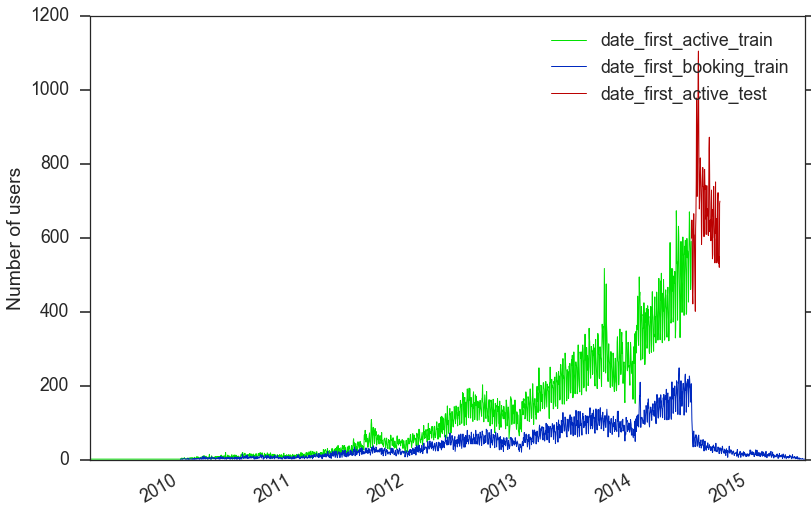

In [52]:
train_users['date_first_active'].value_counts().plot(kind='line', linewidth=1, color='#01E201', label='date_first_active_train')
train_users['date_first_booking'].value_counts().plot(kind='line', linewidth=1, color='#0029BF', label='date_first_booking_train')
test_users['date_first_active'].value_counts().plot(kind='line', linewidth=1, color='#BB0101', label='date_first_active_test')

plt.legend()
plt.ylabel('Number of users')
plt.show()

*The **test data** is in the red portion*

### Take a look closer each year

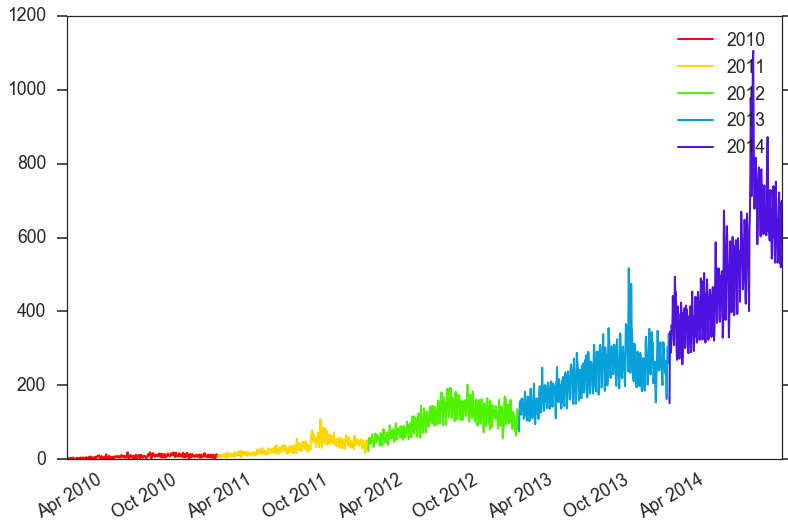

In [89]:
# Year 2010
users_2010 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20100101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20110101, format='%Y%m%d')), 'date_first_active']
users_2010.value_counts().plot(kind='line', linewidth=2, color='#FF0700', label='2010')

# Year 2011
users_2011 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20110101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20120101, format='%Y%m%d')), 'date_first_active']
users_2011.value_counts().plot(kind='line', linewidth=2, color='#FFD600', label='2011')

# Year 2012
users_2012 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20120101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20130101, format='%Y%m%d')), 'date_first_active']
users_2012.value_counts().plot(kind='line', linewidth=2, color='#4FF200', label='2012')

# Year 2013
users_2013 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20130101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')), 'date_first_active']
users_2013.value_counts().plot(kind='line', linewidth=2, color='#07A0DB', label='2013')

# Year 2014
users_2014 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20140101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20150101, format='%Y%m%d')), 'date_first_active']
users_2014.value_counts().plot(kind='line', linewidth=2, color='#5012E0', label='2014')

plt.legend()
plt.show()

In [60]:

weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

In [90]:
print(len(users))
print(len(users_2014))
users_2014


275547
138526


137021   2014-01-01
137022   2014-01-01
137023   2014-01-01
137024   2014-01-01
137025   2014-01-01
137026   2014-01-01
137027   2014-01-01
137028   2014-01-01
137029   2014-01-01
137030   2014-01-01
137031   2014-01-01
137032   2014-01-01
137033   2014-01-01
137034   2014-01-01
137035   2014-01-01
137036   2014-01-01
137037   2014-01-01
137038   2014-01-01
137039   2014-01-01
137040   2014-01-01
137041   2014-01-01
137042   2014-01-01
137043   2014-01-01
137044   2014-01-01
137045   2014-01-01
137046   2014-01-01
137047   2014-01-01
137048   2014-01-01
137049   2014-01-01
137050   2014-01-01
            ...    
275517   2014-09-30
275518   2014-09-30
275519   2014-09-30
275520   2014-09-30
275521   2014-09-30
275522   2014-09-30
275523   2014-09-30
275524   2014-09-30
275525   2014-09-30
275526   2014-09-30
275527   2014-09-30
275528   2014-09-30
275529   2014-09-30
275530   2014-09-30
275531   2014-09-30
275532   2014-09-30
275533   2014-09-30
275534   2014-09-30
275535   2014-09-30
